# Laboratorio 6
**Ciencias naturales y tecnología**

Solución de un problema aplicado usando el algoritmo de Grover

**Estudiante:** Nicolas Piñeros Campo

## Contexto:

Catalina, una estudiante de Ingeniería de Sistemas se encuentra planeando su horario de clases. Las materias que puede ver son las siguientes:

- CALV
- AYED
- MATD
- CNYT
- CIPP

Sin embargo, Catalina necesita que su horario cumpla las siguientes condiciones de forma simultánea:

1. Si inscribe MATD, entonces también inscribirá CALV
2. Si inscribe AYED, entonces también inscribirá CNYT
3. Verá MATD o CIPP pero sólo una de las dos
4. No inscribirá CALV o no inscribirá AYED
5. No inscribirá CNYT o no inscribirá CIPP


## Ejercicio: 
Necesitas construir un oráculo que implemente las condiciones dadas y **dibujarlo**. Requerirás alambres para las incógnitas, alambres para las condiciones 1 a 5 y un alambre para la condición total. Finalmente debes usar el algoritmo de Grover (**dibuja el circuito de Grover**) para determinar el o los posibles horarios que puede hacer Catalina ejecutando tu circuito con ```shots=1000``` en el simulador. Debes mostrar tu histograma e interpretar las soluciones redactando en español cómo estaría o cómo estarían conformados los horarios que puede armar Catalina.

---

### Ayudas: 

Catalina te recuerda que: 

* La condición $p \rightarrow q$ es lógicamente equivalente a $\lnot p \lor q$.
* Si una condición es de la forma: 

$$\mathrm{variable}_0 \lor \mathrm{variable}_1$$ 

la puedes implementar de la siguiente manera:




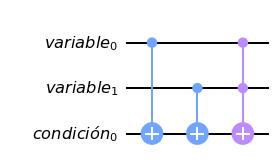

* Si una condición es de la forma: 

$$\mathrm{variable}_0 \lor \lnot \mathrm{variable}_1$$ 

la puedes implementar de la siguiente manera:

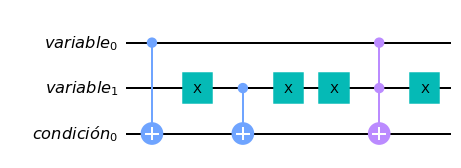

* Puedes generalizar estas ayudas para implementar tu oráculo, también puedes usar otras equivalencias lógicas que consideres convenientes.

* Sólo necesitarás implementar una iteración del algoritmo de Grover.

# Solución:

In [2]:
# Importación de librerías
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

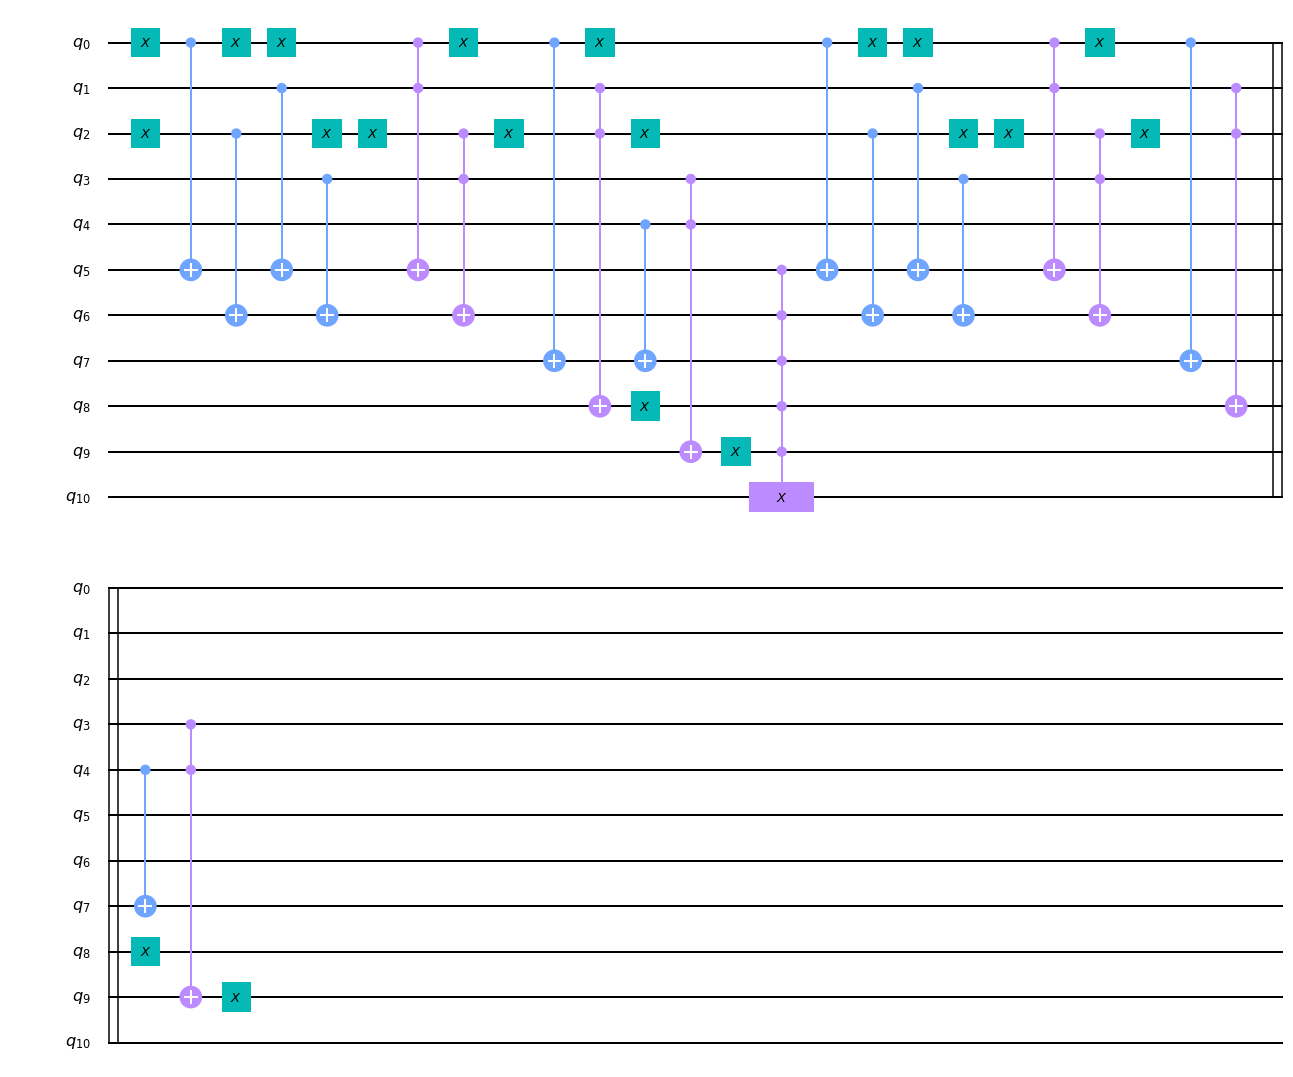

In [4]:
asignaturas = QuantumCircuit(11)
#donde MATD,CALV,AYED,CNYT,CIPP son los alambres 0,1,2,3,4 respectivamente
#condicion si inscribe MATD entonces tambien CALV
asignaturas.x(0)
asignaturas.cx(0,5)
asignaturas.x(0)
asignaturas.cx(1,5)
asignaturas.x(0)
asignaturas.ccx(0,1,5)
asignaturas.x(0)
#condicion si inscribe AYED entonces tambien CNYT
asignaturas.x(2)
asignaturas.cx(2,6)
asignaturas.x(2)
asignaturas.cx(3,6)
asignaturas.x(2)
asignaturas.ccx(2,3,6)
asignaturas.x(2)
#condicion vera MATD o CIPP pero solo una de las dos 
asignaturas.cx(0,7)
asignaturas.cx(4,7)
#condicion No inscribira CALV o no inscribira AYED
asignaturas.ccx(1,2,8)
asignaturas.x(8)
#condicion No inscribira CNYT o no inscribira CIPP
asignaturas.ccx(3,4,9)
asignaturas.x(9)
#medicion para condicion final
asignaturas.mct([5,6,7,8,9],10)
#Deshacer
asignaturas.x(0)
asignaturas.cx(0,5)
asignaturas.x(0)
asignaturas.cx(1,5)
asignaturas.x(0)
asignaturas.ccx(0,1,5)
asignaturas.x([0,2])
asignaturas.cx(2,6)
asignaturas.x(2)
asignaturas.cx(3,6)
asignaturas.x(2)
asignaturas.ccx(2,3,6)
asignaturas.x(2)
asignaturas.cx(0,7)
asignaturas.cx(4,7)
asignaturas.ccx(1,2,8)
asignaturas.x(8)
asignaturas.ccx(3,4,9)
asignaturas.x(9)
asignaturas.draw('mpl')

In [5]:
grover_asignaturas = asignaturas.to_gate()
grover_asignaturas.name = "Grover Asignaturas"

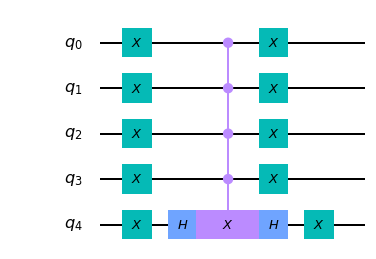

In [6]:
opd = QuantumCircuit(5)
opd.x([0,1,2,3,4])
opd.h(4)
opd.mct([0,1,2,3],4)
opd.h(4)
opd.x([0,1,2,3,4])
opd.draw(output = 'mpl')

In [7]:
difusion = opd.to_gate()
difusion.name = "difusion"

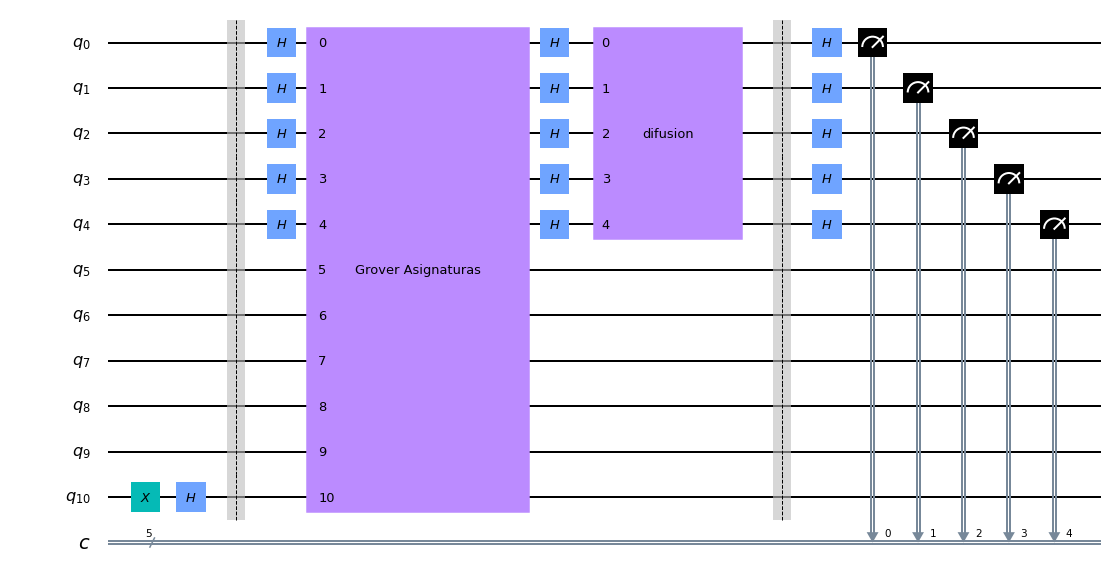

In [9]:
grover = QuantumCircuit(11, 5)
grover.x(10)
grover.h(10)
grover.barrier()
grover.h([0, 1, 2, 3,4])

for i in range(1):
    grover.append(grover_asignaturas, [0, 1, 2,3,4,5,6,7,8,9,10])
    grover.h([0, 1,2,3,4])
    grover.append(difusion, [0, 1,2,3,4])
    grover.barrier()
    grover.h([0, 1,2,3,4])

grover.measure([0, 1,2,3,4], [0, 1,2,3,4])
grover.draw('mpl')

In [17]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(grover, backend=simulador, shots=1000).result().get_counts()
print(conteos)

{'11110': 6, '10110': 19, '00001': 6, '00011': 195, '00110': 11, '00111': 7, '00101': 5, '01110': 6, '10001': 12, '11101': 5, '10111': 6, '11100': 4, '01100': 10, '01001': 8, '10011': 3, '11111': 6, '01011': 199, '10010': 176, '01101': 6, '10101': 5, '10100': 9, '01010': 9, '11011': 6, '10000': 217, '11001': 7, '00100': 12, '00000': 7, '11010': 6, '01000': 8, '01111': 9, '11000': 6, '00010': 9}


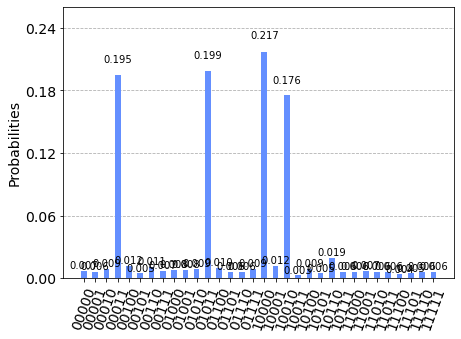

In [18]:
plot_histogram(conteos)

## Conclusiones
de manera que el problema de las asignaturas presenta las soluciones de $11000$,$11010$,$00001$,$010001$ lo que representarian que:

$11000$ Catalina inscribe MATD y CALV

$11010$ Catalina inscribe MATD, CALV y CNYT

$00001$ Catalina inscribe solo CIPP

$01001$ Catalina inscribe CIPP y CALV

Lo que concuerda con las condiciones y requisitos planteados